<a href="https://colab.research.google.com/github/ghoshdebapratim1/AmosLabCode/blob/main/Survey_Data_Statistical_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Joining with Other data

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 10.2 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=cb4e743580e8831d9712d16d73d46a754d74af7a5dbf80c08de0d9a99bad4ed2
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=b495e6306d170a41ea04e7161b430eb0cb4f2d693077c5d7e81b014bad0f44ab
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
import pandas as pd 

import numpy as np 

from google.colab import drive 

drive.mount('/content/drive')

import pandas as pd
#from cryptography.fernet import Fernet

Mounted at /content/drive


In [ ]:
path_piiData='/content/drive/MyDrive/Amos Lab/Amos Lab Data/UIC/COMPASS Survey_September 28, 2022_08.11.csv'

data=pd.read_csv(path_piiData)

In [ ]:
  data=data.iloc[8:,:]

  # Renaming the Major and UIN Columns 

  data = data.rename(columns={'Q2': 'uin', 'Q3': 'major'})
  data['uin']=data['uin'].astype(str)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
compass_data=pd.read_csv('/content/drive/MyDrive/Amos Lab/Amos Lab Data/UIC/UIC_Compass.txt',sep="\t",header=[1])
compass_data

,UIN,Last Name,Legal First Name,Primary Curr Major Name,Race Description,International Birth Nation Name,Address State Name
0,650245175,Viramontes,Nickolas,Computer Engineering,NaN,NaN,Illinois
1,650279249,Patel,Mandar,Computer Science,Asian,NaN,Illinois
2,650316728,Gewargis,Alan,Engineering-Undeclared,White,NaN,Illinois
3,650321892,Rezek,Bader,Data Science,Black or African American,NaN,Illinois
4,650404116,Deer,Dylan,Computer Science,Asian,NaN,Illinois
...,...,...,...,...,...,...,...
430,679698175,Bhawsar,Amithi,Computer Science,Asian,India,Illinois
431,679701278,Gatuz,Alexis,Biomedical Engineering,Asian,NaN,Illinois
432,679787861,Lopez,Jesse,Computer Engineering,NaN,NaN,Illinois
433,679892326,Payaniappa,Srivishal,Computer Engineering,Asian,India,Illinois


In [ ]:
compass_data['Primary Curr Major Name'].unique()

array(['Computer Engineering', 'Computer Science',
       'Engineering-Undeclared', 'Data Science', 'Biomedical Engineering',
       'Engineering Physics', 'Electrical Engineering',
       'Mechanical Engineering', 'Industrial Engineering',
       'Computer Science & Design', 'Chemical Engineering',
       'Civil Engineering'], dtype=object)

In [ ]:
compass_data.rename(columns={'UIN': 'uin'}, inplace=True)
compass_data['uin']=compass_data['uin'].apply(str)

In [ ]:
data_merged = pd.merge(data, compass_data, how="left", on=["uin"])
data_merged

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q8_31,Q8_32,Q8_33,Q9,Last Name,Legal First Name,Primary Curr Major Name,Race Description,International Birth Nation Name,Address State Name
0,2022-09-13 07:29:07,2022-09-13 07:32:02,0,131.193.239.133,100,174,1,2022-09-13 07:32:02,R_1OIg8u4cWkRCVc9,NaN,...,1,1,2,1,Khan,Ifrah,Engineering-Undeclared,Asian,NaN,Illinois
1,2022-09-13 07:28:56,2022-09-13 07:33:27,0,131.193.119.153,100,270,1,2022-09-13 07:33:28,R_31bZGjkE0hh8L3y,NaN,...,1,3,2,2,Velasquez,Carlos,Computer Science,NaN,NaN,Illinois
2,2022-09-13 07:30:07,2022-09-13 07:33:52,0,131.193.86.29,100,224,1,2022-09-13 07:33:52,R_3QGfeugfR4JEKB4,NaN,...,3,3,3,2,Nallamala,Ahmik Ruben,Computer Science,Asian,,Illinois
3,2022-09-13 07:29:00,2022-09-13 07:34:15,0,131.193.97.61,100,314,1,2022-09-13 07:34:15,R_CjBFUDl8mq1i5nr,NaN,...,3,2,1,2,Del Mundo,Rainn,Computer Science,Asian,NaN,Illinois
4,2022-09-13 07:28:58,2022-09-13 07:35:35,0,131.193.103.65,100,396,1,2022-09-13 07:35:36,R_2zcPt5cXlIJrmVb,NaN,...,1,1,2,1,Kachappilly,Isabel,Computer Science,Asian,NaN,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2022-09-20 10:03:11,2022-09-20 10:08:42,0,174.209.47.17,44,330,0,2022-09-27 10:08:43,R_1dL94nHQTfdbAdx,NaN,...,NaN,NaN,NaN,NaN,Richards,Josh,Engineering-Undeclared,Asian,NaN,Ohio
433,2022-09-20 10:03:11,2022-09-20 10:08:42,0,174.209.47.17,44,330,0,2022-09-27 10:08:43,R_1dL94nHQTfdbAdx,NaN,...,NaN,NaN,NaN,NaN,Richards,Josh,Engineering-Undeclared,White,NaN,Ohio
434,2022-09-20 10:03:23,2022-09-20 10:08:43,0,131.193.164.81,44,320,0,2022-09-27 10:08:44,R_3kAGQr4rGnEh90k,NaN,...,NaN,NaN,NaN,NaN,Khan,Hasan,Computer Science,Asian,NaN,Illinois
435,2022-09-20 10:06:44,2022-09-20 10:11:17,0,131.193.251.254,78,272,0,2022-09-27 10:11:19,R_29agvJumv0KqjeX,NaN,...,NaN,NaN,NaN,NaN,Patel,Shail,Computer Science,Asian,India,


## Missing Value Imputation

In [ ]:
sum(data_merged['Primary Curr Major Name'].value_counts())

400

In [ ]:
data_merged.shape

(437, 84)

In [ ]:
from fancyimpute import IterativeImputer as MICE

In [ ]:
data_merged.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'uin', 'major', 'Q4_1', 'Q4_2',
       'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q5_1', 'Q5_2',
       'Q5_3', 'Q5_4', 'Q5_5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4',
       'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q8_12',
       'Q8_13', 'Q8_14', 'Q8_15', 'Q8_16', 'Q8_17', 'Q8_18', 'Q8_19', 'Q8_20',
       'Q8_21', 'Q8_22', 'Q8_23', 'Q8_24', 'Q8_25', 'Q8_26', 'Q8_27', 'Q8_28',
       'Q8_29', 'Q8_30', 'Q8_31', 'Q8_32', 'Q8_33', 'Q9', 'Last Name',
       'Legal First Name', 'Primary Curr Major Name', 'Race Description',
       'International Birth Nat

In [ ]:
data_res =data_merged.drop([ 'StartDate', 'EndDate', 'Status', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'major', 'uin', 'IPAddress','Q9', 'Last Name',
       'Legal First Name', 'Primary Curr Major Name', 'Race Description',
       'International Birth Nation Name', 'Address State Name'],axis=1)

In [ ]:
#trans = MICE(verbose=False)
#trans.fit(data_res)
#data_res_comp = trans.transform(data_res)

data_res_comp=data_res.dropna()

In [ ]:
data_res_comp=pd.DataFrame(data_res_comp)

In [ ]:
data_res_comp.columns=['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9',
       'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q8_1', 'Q8_2',
       'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10',
       'Q8_11', 'Q8_12', 'Q8_13', 'Q8_14', 'Q8_15', 'Q8_16', 'Q8_17', 'Q8_18',
       'Q8_19', 'Q8_20', 'Q8_21', 'Q8_22', 'Q8_23', 'Q8_24', 'Q8_25', 'Q8_26',
       'Q8_27', 'Q8_28', 'Q8_29', 'Q8_30', 'Q8_31', 'Q8_32', 'Q8_33']

In [ ]:
data_res_comp=data_res_comp.round(0)
data_res_comp

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q5_1,...,Q8_24,Q8_25,Q8_26,Q8_27,Q8_28,Q8_29,Q8_30,Q8_31,Q8_32,Q8_33
0,5,5,5,5,5,5,5,5,5,5,...,1,1,1,1,1,1,1,1,1,2
1,5,5,3,3,2,5,5,4,5,3,...,1,2,1,4,1,1,1,1,3,2
2,4,3,3,3,3,4,5,4,4,3,...,3,3,3,3,3,3,3,3,3,3
3,5,4,4,5,5,5,5,5,5,4,...,4,1,2,2,1,1,2,3,2,1
4,5,5,5,4,4,5,5,5,5,4,...,1,1,3,4,5,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,4,4,3,3,3,5,4,5,4,4,...,1,3,3,4,4,1,1,1,3,1
423,4,4,3,3,3,5,4,5,4,4,...,1,3,3,4,4,1,1,1,3,1
424,5,5,5,5,5,5,5,5,5,3,...,1,1,2,5,5,1,2,1,2,2
425,3,3,2,2,4,3,5,5,5,1,...,1,1,1,1,1,1,5,3,3,1


In [ ]:
data_res_comp=data_res_comp.astype(int)

In [ ]:
stats.kstest(data_res_comp['Q4_1'], 'norm')

KstestResult(statistic=0.9959619299253591, pvalue=0.0)

In [ ]:
from scipy import stats
alpha=0.05
for i in data_res_comp.columns:
    print ([i])
    a,b= stats.kstest(data_res_comp[[i]], 'norm')
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['Q4_1']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_2']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_3']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_4']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_5']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_6']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_7']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_8']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q4_9']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q5_1']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q5_2']
Statistics 0.9999997133484281 p-value 0.0
The null hypothesis can be rejected
['Q5_3']
Statistics 0.9999997133484281 p-va

In [ ]:
data_res_comp.columns

Index(['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9',
       'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q8_1', 'Q8_2',
       'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10',
       'Q8_11', 'Q8_12', 'Q8_13', 'Q8_14', 'Q8_15', 'Q8_16', 'Q8_17', 'Q8_18',
       'Q8_19', 'Q8_20', 'Q8_21', 'Q8_22', 'Q8_23', 'Q8_24', 'Q8_25', 'Q8_26',
       'Q8_27', 'Q8_28', 'Q8_29', 'Q8_30', 'Q8_31', 'Q8_32', 'Q8_33',
       'mean_car_dec_making', 'mean_car_exp_plans', 'mean_car_env_plans',
       'mean_car_self_plans', 'mean_car_thoughts_inv'],
      dtype='object')

In [ ]:
data_res_comp["mean_car_dec_making"] = data_res_comp.loc[:, ['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9']].mean(axis = 1)
data_res_comp["mean_car_exp_plans"] = data_res_comp.loc[:, ['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5']].mean(axis = 1)
data_res_comp["mean_car_env_plans"] = data_res_comp.loc[:, ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6']].mean(axis = 1)
data_res_comp["mean_car_self_plans"] = data_res_comp.loc[:, ['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5']].mean(axis = 1)
data_res_comp["mean_car_thoughts_inv"] = data_res_comp.loc[:, ['Q8_1', 'Q8_2',
       'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10',
       'Q8_11', 'Q8_12', 'Q8_13', 'Q8_14', 'Q8_15', 'Q8_16', 'Q8_17', 'Q8_18',
       'Q8_19', 'Q8_20', 'Q8_21', 'Q8_22', 'Q8_23', 'Q8_24', 'Q8_25', 'Q8_26',
       'Q8_27', 'Q8_28', 'Q8_29', 'Q8_30', 'Q8_31', 'Q8_32', 'Q8_33']].mean(axis = 1)

In [ ]:
data_res_comp

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q8_12,Q8_13,Q8_14,Q8_15,Q8_16,Q8_17,Q8_18,Q8_19,Q8_20,Q8_21,Q8_22,Q8_23,Q8_24,Q8_25,Q8_26,Q8_27,Q8_28,Q8_29,Q8_30,Q8_31,Q8_32,Q8_33,mean_car_dec_making,mean_car_exp_plans,mean_car_env_plans,mean_car_self_plans,mean_car_thoughts_inv
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.000000,5.0,5.000000,5.0,1.575758
1,5.0,5.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,4.111111,3.6,2.333333,3.6,1.939394
2,4.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.666667,3.2,3.166667,3.0,3.000000
3,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,4.777778,4.6,3.166667,4.4,1.787879
4,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,2.0,3.0,1.0,1.0,2.0,4.777778,4.2,2.333333,3.8,2.787879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,4.222222,4.0,3.000000,4.0,2.424242
433,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,4.222222,4.0,3.000000,4.0,2.424242
434,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,5.000000,4.4,3.333333,4.0,2.393939
435,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,4.888889,5.0,4.000000,3.6,2.363636


In [ ]:
data_tests=pd.concat([data_res_comp[['mean_car_dec_making', 'mean_car_exp_plans', 'mean_car_env_plans','mean_car_self_plans', 'mean_car_thoughts_inv']],data_merged['Primary Curr Major Name']],axis=1)

In [ ]:
data_tests.shape

(400, 6)

In [ ]:
data_tests = data_tests.dropna(how='any',axis=0) 

In [ ]:
major_list=list(data_tests['Primary Curr Major Name'].unique())

In [ ]:

for col in ['mean_car_dec_making', 'mean_car_exp_plans', 'mean_car_env_plans','mean_car_self_plans', 'mean_car_thoughts_inv']:
  print(col)
  print(stats.kruskal(*[group[col].values for name, group in data_tests.groupby('Primary Curr Major Name')]))





mean_car_dec_making
KruskalResult(statistic=13.043615700281215, pvalue=0.2904842726558598)
mean_car_exp_plans
KruskalResult(statistic=13.93677646262711, pvalue=0.23651166543212065)
mean_car_env_plans
KruskalResult(statistic=26.386394010067814, pvalue=0.0056829614723150354)
mean_car_self_plans
KruskalResult(statistic=4.776183102167572, pvalue=0.9415192758966432)
mean_car_thoughts_inv
KruskalResult(statistic=6.041457261389218, pvalue=0.8705838163659441)


In [ ]:
from scipy import stats

for major in major_list:
  data_sub=data_tests[data_tests['Primary Curr Major Name']!=major]
  print(major+"#############")
  for col in ['mean_car_dec_making', 'mean_car_exp_plans', 'mean_car_env_plans','mean_car_self_plans', 'mean_car_thoughts_inv']:
        print(col)
        print(stats.kruskal(*[group[col].values for name, group in data_sub.groupby('Primary Curr Major Name')]))

Engineering-Undeclared#############
mean_car_dec_making
KruskalResult(statistic=12.701897459683043, pvalue=0.2408198961381346)
mean_car_exp_plans
KruskalResult(statistic=11.754054272831379, pvalue=0.30185395583291497)
mean_car_env_plans
KruskalResult(statistic=24.967330153405047, pvalue=0.005407775454684163)
mean_car_self_plans
KruskalResult(statistic=4.565719668539407, pvalue=0.9182402915770626)
mean_car_thoughts_inv
KruskalResult(statistic=5.866379738959055, pvalue=0.8263616698071696)
Computer Science#############
mean_car_dec_making
KruskalResult(statistic=13.048924866234662, pvalue=0.22094922731609987)
mean_car_exp_plans
KruskalResult(statistic=11.060710255949164, pvalue=0.3528077226176105)
mean_car_env_plans
KruskalResult(statistic=24.148223599105766, pvalue=0.007216531585423019)
mean_car_self_plans
KruskalResult(statistic=4.966800179829181, pvalue=0.8933847253852112)
mean_car_thoughts_inv
KruskalResult(statistic=6.116798307678378, pvalue=0.8053567127062091)
Data Science##########

In [ ]:
from scipy.stats import mannwhitneyu

for i in majors : 
  for j in majors :
    if i !=j:
      group1=data_tests[data_tests['Primary Curr Major Name']==i]['mean_car_env_plans']
      group2=data_tests[data_tests['Primary Curr Major Name']==j]['mean_car_env_plans']
      print(i+">"+j)
      print(mannwhitneyu(group1, group2,alternative='greater'))

Engineering-Undeclared>Computer Science
MannwhitneyuResult(statistic=2826.0, pvalue=0.8749579037440225)
Engineering-Undeclared>Data Science
MannwhitneyuResult(statistic=77.0, pvalue=0.6742427083641391)
Engineering-Undeclared>Computer Engineering
MannwhitneyuResult(statistic=888.5, pvalue=0.8947153282992135)
Engineering-Undeclared>Computer Science & Design
MannwhitneyuResult(statistic=278.5, pvalue=0.04802798436167317)
Engineering-Undeclared>Mechanical Engineering
MannwhitneyuResult(statistic=469.0, pvalue=0.32059208131719297)
Engineering-Undeclared>Electrical Engineering
MannwhitneyuResult(statistic=705.0, pvalue=0.003851078045179368)
Engineering-Undeclared>Engineering Physics
MannwhitneyuResult(statistic=145.0, pvalue=0.07194710760526779)
Engineering-Undeclared>Biomedical Engineering
MannwhitneyuResult(statistic=592.0, pvalue=0.9059786417630649)
Engineering-Undeclared>Chemical Engineering
MannwhitneyuResult(statistic=2.5, pvalue=0.9328392596418379)
Engineering-Undeclared>Civil Enginee

In [ ]:
data_tests['Primary Curr Major Name'].value_counts()

Computer Science             184
Computer Engineering          60
Biomedical Engineering        41
Engineering-Undeclared        35
Electrical Engineering        29
Mechanical Engineering        25
Computer Science & Design     12
Engineering Physics            6
Data Science                   5
Chemical Engineering           1
Civil Engineering              1
Industrial Engineering         1
Name: Primary Curr Major Name, dtype: int64



## Electrical Engineering



In [ ]:
data_res_comp.columns

Index(['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9',
       'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q8_1', 'Q8_2',
       'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10',
       'Q8_11', 'Q8_12', 'Q8_13', 'Q8_14', 'Q8_15', 'Q8_16', 'Q8_17', 'Q8_18',
       'Q8_19', 'Q8_20', 'Q8_21', 'Q8_22', 'Q8_23', 'Q8_24', 'Q8_25', 'Q8_26',
       'Q8_27', 'Q8_28', 'Q8_29', 'Q8_30', 'Q8_31', 'Q8_32', 'Q8_33',
       'mean_car_dec_making', 'mean_car_exp_plans', 'mean_car_env_plans',
       'mean_car_self_plans', 'mean_car_thoughts_inv'],
      dtype='object')

In [ ]:
data_elec_merged=pd.concat([data_res_comp[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6']],data_merged['Primary Curr Major Name']],axis=1)

data_elec_merged=data_elec_merged[data_elec_merged['Primary Curr Major Name']=='Electrical Engineering']

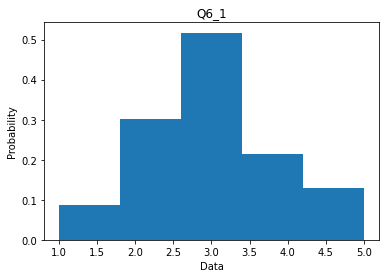

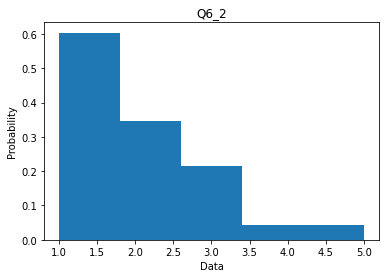

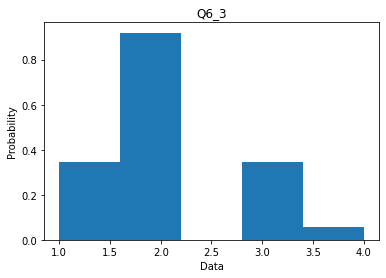

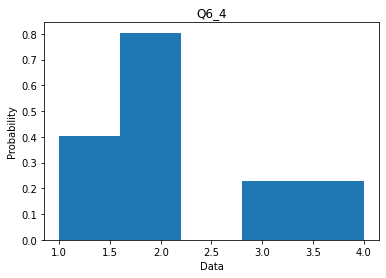

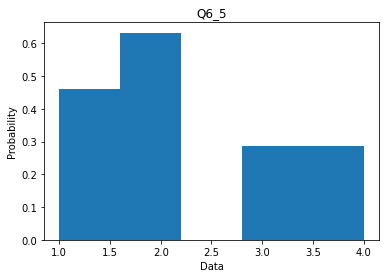

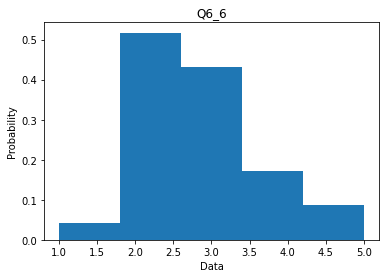

In [ ]:
import matplotlib.pyplot as plt

for col in ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6'] :

      plt.hist(data_elec_merged[col], density=True, bins=5)
      plt.ylabel('Probability')
      plt.xlabel('Data')
      plt.title(col)
      plt.show()